In [1]:
import plotly.plotly as py
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='manfred.moosleitner', api_key='UTpisrO4OEiCWBWqjrVP')

data = dict(
    type='sankey',
    orientation = "v",
    arrangement = "snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(
            color="black",
            width=0.5
        ),
        label=["thema1", "thema2", "thema3", "1960", "1970", "1980", "1990"],
        color=["blue", "red", "green", "black", "black", "black"]
    ),
    link=dict(
        source=[0, 1, 2, 0, 1, 2, 0, 1, 2],
        target=[3, 4, 5, 5, 3, 4, 6, 6, 6],
#          value=[1, 1, 1, 1, 1, 1],
         value=[8, 4, 2, 8, 4, 2, 4, 6, 9],
        color=["#0000FF","red", "green","blue","red", "green"]
    ))

layout = dict(
    title="Basic Sankey Diagram",
    font=dict(
        size=10
    )
)

fig = dict(data=[data], layout=layout)
iplot(fig, validate=False)

In [ ]:
jahre = {}
for i, jahr in enumerate(range(1960, 2001)):
    jahre[jahr] = i

for k in jahre:
    print(k, jahre[k])

In [2]:
import pandas as pd

data = pd.read_csv("data_parallel.csv")

aggregation = data.groupby(['Thema', 'Jahr'])['Thema'].count()

type(aggregation)

pandas.core.series.Series

In [ ]:
color = {
	"Anpassung": "#E74C3C",
	"Erfahrung": "#1abc9c",
	"Lernen": "#283747",
	"Raum und Zeit": "#f39c12",
	"Realität": "#5499c7",
	"Wirklichkeit": "#f0c40f",
	"Sprache": "#82e0aa",
	"Viabilität": "#cacfd2",
	"Wahrnehmung": "#ff00ff",
}

colors = [color[thema] for thema in sorted(color)]
colors2 = []
for k, v in color.items():
    colors2.append(v)

print(colors)
print(colors2)

In [3]:
import pandas as pd
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


data = pd.read_csv("data_parallel.csv")

color = {
	"Anpassung": "#E74C3C",
	"Erfahrung": "#1abc9c",
	"Lernen": "#283747",
	"Raum und Zeit": "#f39c12",
	"Realität": "#5499c7",
	"Wirklichkeit": "#f0c40f",
	"Sprache": "#82e0aa",
	"Viabilität": "#cacfd2",
	"Wahrnehmung": "#ff00ff",
}

themen = {
	"Anpassung": 0,
	"Erfahrung": 1,
	"Lernen": 2,
	"Raum und Zeit": 3,
	"Realität": 4,
	"Wirklichkeit": 5,
	"Sprache": 6,
	"Viabilität": 7,
	"Wahrnehmung": 8,
}

jahre = {}
for i, jahr in enumerate(range(1960, 2001)):
	jahre[jahr] = i

colors = [color[key] for key in sorted(color)]
labels1 = [thema for thema in sorted(color)]
labels2 = [color[key] for key in sorted(color)]
labels = labels1 + labels2

source = []
target = []
values = []

aggregation = data.groupby(['Thema', 'Jahr'])['Thema'].count()
for (k1, k2), v in aggregation.items():
	# print(k1, k2, v)
	source.append(themen[k1])
	target.append(k2)
	values.append(v)


data_trace = dict(
	type='sankey',
	domain=dict(
		x=[0, 1],
		y=[0, 1]
	),
	orientation="v",
	valueformat=".0f",
	node=dict(
		pad=5,
		thickness=40,
		line=dict(
			color="green",
			width=0
		),
		label=labels,
		color=colors
	),
	link=dict(
		source=source,
		target=target,
		value=values,

	)
)

layout = dict(
	title='Erste "Stränge"',
	height=772,
	font=dict(
		size=10
	),
)

fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)


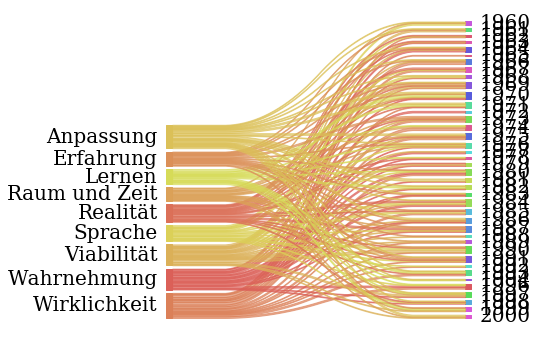

In [5]:
import pandas as pd
from pySankey import sankey

df = pd.read_csv("data_parallel.csv")

leftLabels = [thema for thema in sorted(list(set(df['Thema'])), reverse=True)]
rightLabels = [jahr for jahr in sorted(list(set(df['Jahr'])), reverse=True)]

sankey.sankey(
    left=df['Thema'], right=df['Jahr'], aspect=9,
    leftLabels=leftLabels, rightLabels=rightLabels,
    fontsize=20, figure_name="Stränge"
)

In [31]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});

<IPython.core.display.Javascript object>

In [36]:
%%html
<!-- Create a div where the graph will take place -->
<div id="my_dataviz"></div>

<!-- Create a div for the tooltip -->
<div id="tooltip"></div>

In [46]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {
        
// begin
        // create the svg area
var svg = d3.select("#my_dataviz")
  .append("svg")
    .attr("width", 500)
    .attr("height", 500)
  .append("g")
    .attr("transform", "translate(250,250)")

        var allText = [];
        var allTextLines = [];
        var Lines = [];
        var txtFile = new XMLHttpRequest();
        txtFile.open("GET", "file:///home/frod/git/DigiVis/python/data_parallel.csv", true);
        txtFile.onreadystatechange = function() {
            allText = txtFile.responseText;
            allTextLines = allText.split(/\r\n|\n/);
            console.log("in onreadystatechange");
            console.log(allTextLines);
        }
        

// create a matrix
var matrix = [
  [11975,  5871, 8916, 2868],
  [ 1951, 10048, 2060, 6171],
  [ 8010, 16145, 8090, 8045],
  [ 1013,   990,  940, 6907]
];
var names = ["A", "B", "C", "D"]

// give this matrix to d3.chord(): it will calculates all the info we need to draw arc and ribbon
var res = d3.chord()
    .padAngle(0.05)
    .sortSubgroups(d3.descending)
    (matrix)

// add the groups on the inner part of the circle
svg
  .datum(res)
  .append("g")
  .selectAll("g")
  .data(function(d) { return d.groups; })
  .enter()
  .append("g")
  .append("path")
    .style("fill", "grey")
    .style("stroke", "black")
    .attr("d", d3.arc()
      .innerRadius(230)
      .outerRadius(240)
    )

// Add a tooltip div. Here I define the general feature of the tooltip: stuff that do not depend on the data point.
// Its opacity is set to 0: we don't see it by default.
var tooltip = d3.select("#my_dataviz")
  .append("div")
  .style("opacity", 0)
  .attr("class", "tooltip")
  .style("background-color", "white")
  .style("border", "solid")
  .style("border-width", "1px")
  .style("border-radius", "5px")
  .style("padding", "10px")

// A function that change this tooltip when the user hover a point.
// Its opacity is set to 1: we can now see it. Plus it set the text and position of tooltip depending on the datapoint (d)
var showTooltip = function(d) {
  tooltip
    .style("opacity", 1)
    .html("Source: " + names[d.source.index] + "<br>Target: " + names[d.target.index])
    .style("left", (d3.event.pageX + 15) + "px")
    .style("top", (d3.event.pageY - 28) + "px")
}

// A function that change this tooltip when the leaves a point: just need to set opacity to 0 again
var hideTooltip = function(d) {
  tooltip
    .transition()
    .duration(1000)
    .style("opacity", 0)
}

// Add the links between groups
svg
  .datum(res)
  .append("g")
  .selectAll("path")
  .data(function(d) { return d; })
  .enter()
  .append("path")
    .attr("d", d3.ribbon()
      .radius(220)
    )
    .style("fill", "#69b3a2")
    .style("stroke", "black")
  .on("mouseover", showTooltip )
  .on("mouseleave", hideTooltip )
// end
        
    })
})(element);

<IPython.core.display.Javascript object>